# Bias and Fairness
`! git clone https://github.com/DS3001/bias_and_fairness`

## Inference, Prediction, and Decision
- We're worried about what happens when the prediction tools we build make contact with reality: It's one thing to notice that a group of people are more likely to default on loans, it's another thing to deny them loans or try to avoid advertising to them in order to cut them out of credit markets
- People often use two words: **Bias** and **Fairness**, often preceded by the word **Algorithmic** to focus the discussion on machine learning
    - Bias means that the data or model produce predictions that systematically fail to represent reality
    - Fairness means that the data and model facilitate decision-making that satisfies our moral and ethical standards 
- My bias is: I generally think that -- outside of a company like Goldman Sachs or Amazon or Google where the explicit goal is to use information to make money at the expense of other agents -- most people are working hard to do the right thing, mistakes are tragic and unavoidable, and the people who are grossly negligent should suffer serious professional consequences. Mostly, using data is better than not, and building a better world is an on-going process. I understand people might disagree, but that's my general initial position without more details.

## Not Anything Can Go In a Model
- First, the bare minimum is to follow the law, and there are many laws that determine what can and cannot be used in a model, and approval processes for machine learning models to be used commercially
- For two US laws, here are some (not all) protected and unprotected characteristics:

|Attribute| Fair Housing Agreement | Equal Credit Opportunity Act |
|:--------|:----------:| :----------: |
|Race| Protected | Protected |
|National Origin| Protected | Protected |
|Religion| Protected | Protected |
|Sex| Protected | Protected |
|Disability| Protected | Not Protected |
|Marital Status| Not Protected | Protected |
|Recipient of Public Assistance| Not Protected | Protected |
|Age| Not Protected | Protected |

- For a predictive model to be used in a clinical setting for decision-making, it must be approved by the FDA (Models are "Software as a Medical Device," or SaMD, and the rules for this are changing rapidly as more and more models are built into medical devices like insulin pumps)
- The rules tend to be even stronger in Europe (EU-GDPR) and California (California Consumer Privacy Act, California Privacy Rights Act)

## Typical Protected Variables:
- Immutable characteristics: age (over 40), ancestry, ethnicity, national origin, race
- Health data: genetic information, HIV/AIDS status, pregnancy, disability (especially the ADA)
- Sexual orientation and gender identity: sex, sexual orientation, gender identity or gender expression
- Other: military or veteran status, religion

## Not Even All Research is Allowed!
- If an intervention is being performed on human subjects or personally identifiable data is being collected, the research must receive Institutional Review Board approval ( https://www.ecfr.gov/current/title-21/chapter-I/subchapter-A/part-56 , https://www.hhs.gov/ohrp/regulations-and-policy/regulations/45-cfr-46/index.html )
- Increasingly, IRB approval is required for projects using data from such interventions, sometimes even when de-identified
- This isn't a guarantee the research won't be a disaster, just that it won't harm participants or be negligent with their data
- There are three principles from the Belmont Report ( https://www.hhs.gov/ohrp/regulations-and-policy/belmont-report/index.html )
    1. Respect for persons: Individuals should be treated with dignity and their choices respected; those with diminished autonomy (incarcerated populations, mentally ill, etc.) should receive special protection
    2. Beneficience: Researchers should protect subjects by maximizing benefits and minimizing risks
    3. Justice: Researchers should distribute the benefits and costs of research fairly
- The standard rule-of-thumb for risk is, "anything more dangerous than common activities of daily life, like drawing blood at a doctor's office or driving a car"
- An important concept is **coercion**: No one should be coerced to participate in research in return for some benefit (e.g. the warden [not the researchers] gives inmate participants who decline to participate extra work, the school principal [not the researchers] gives student participants in a study extra credit)
- Obviously, if you don't work at an academic or government institution, the rules are different, but this is a nice "gold standard" to keep in mind

## If I Follow the Rules, Aren't I OK?
- Not necessarily
- There's a legal principle of **disparate impact**: Any practice that disproportionately impacts a protected group might be subject to scrutiny and litigation, especially if the practice is applied inconsistently (e.g. All non-Americans are required to take an ESL test to apply for a job, but it's never actually enforced for Europeans.)
- We know that it's very to create a model that facilitates disparate impact because of omitted variables bias: Any person in a protected category that is correlated with variables in the model will receive a prediction that is correlated with their protected category
- Humans do, in fact, have to review or audit models scrupulously to try to understand where good intentions or biased data can go wrong: Even well-intentioned modelers can end up unintentionally creating harm
- Let's look at some of the known ways harm is created, whether intentional or not

## Classical Sources of Bias in Statistical Reasoning
- Where does the use of statistics go wrong?
- There are classical answers that often come up:
    1. Sampling Bias: The data don't faithfully reflect the population of interest
    2. Simpson's Paradox: Patterns in subsets of the data might not appear when the data are aggregated
    3. The Prosecutor's Fallacy: The probability of the data given a condition is not the probability of the condition given the data
    4. Omitted Variables Bias: Unobserved variables can still have significant impacts on the analysis

## Sampling Bias
- One thing that makes a data set useful or not is whether it is representative of the population of interest: We typically want samples that faithfully captures the prevalence of different groups and their covariances with other observable variables, so that we know our model will make credible predictions about aggregate behavior 
- In a recent survey of Virginia, 59.8% of the population was white non-Hispanic, 19.2% of the population was Black, 8% was Hispanic, 7.2% was Asian, 3% was multi-racial, and .3% was indigenous. 
- In a recent survey of the United States, 60.1% of the population was white non-Hispanic, 12.2% of the population was Black, 18.5% was Hispanic, 5.6% was Asian, 2.8% was multi-racial, and .9% was indigenous.
- Imagine using a dataset from Virginia to make predictions about values at the level of the United States: The frequencies for white non-Hispanic and multi-racial are similar, but the rest are not
- This means that there Black data will be over-represented while Hispanic/Asian/indigenous will be understated when extrapolating from VA to the US, and vice versa when extrapolating from the US to VA
- This is perhaps even worse if our sampling is bad: Imagine our telephone survey in VA only ends up including 12% Black respondents -- That might be representative of the US overall, but not VA specifically
- We can attempt to "fix" this by re-weighting the data: Treating the 12% of the respondents in our phone survey as 19.2% instead, in order to get more accurate predictions (but why was there an imbalance in the first place?)
- This is even more complex if we don't have "true" weights for our analysis, and gives you a clue as to why polling for elections is so difficult
- A contemporary issue here is facial recognition: Many datasets have disproportionately white faces, so algorithms achieve high accuracy but perform differentially across groups (many algorithms have been proposed to re-weight the data to correct the class imbalance)

## Conditional Probability
- The key tool to understanding how people reason with data is **conditional probability**
- It goes like this: "Given that we know $x$ is true, what is the density/distribution of $y$?"
- We write conditional probabilities as $\text{pr}[y|x]$. So, $\text{pr}[\text{Car Accident}|\text{Rainy}]$ and $\text{pr}[\text{Car Accident}|\text{Sunny}]$, which are both distinct from $\text{pr}[\text{Car Accident}]$ and $\text{pr}[\text{Rainy}]$ and $\text{pr}[\text{Clear}]$
- All regression and classification models are essentially mathematical models for expression $\mathbb{E}[y|x]$, which is why they are so useful: They are estimates of the conditional expectation function

## Conditional Probability
- We'll start with a silly example to remind ourselves how conditional probability works: Conferences thrown by journal publishers
- The attendees are business people, who are outgoing, and librarians, who are shy:


|| Outgoing | Shy |
|:--------:|:----------:| :-----: |
|Librarian| 15 | 40 |
|Business| 80 | 60 |

- Imagine you're standing around at cocktail hour trying to decide how to talk to shy people: Business or literature?
- What's the probability a librarian is shy? 40/(15+40) = .727. Most librarians are shy.
- Conditional on meeting a shy person, what is the probability they are a librarian? Well, there are 40 shy librarians, and 40+60=100 shy people, so .4. Conversely, the probability of meeting a shy business person is .6.
- Conditional on meeting a business person, what is the probability they are shy? Well, there are 60 shy business people, and 60+80 business people in total, so 60/140 = .429, and outgoing business people must account for 1-.429 = .561.
- Do you see that's a bit of a surprise? Given that you've met a shy person, they are more likely to be a business person than a librarian, but conditional on being a business person, they're more likely to be outgoing than shy.
- This apparent "circular reasoning" is the core of a lot of biased reasoning about probabilities

## Conditional Probability
- My main motivation of the last slide was to remind you of the definition of conditional probability, and how they're computed:
$$
\text{pr}[A|B] = \dfrac{\text{pr}[A \cap B]}{\text{pr}[B]}
$$
For example,
$$
\text{pr}[\text{Shy}|\text{Librarian}] = \dfrac{\text{pr}[\text{Shy and Librarian}]}{\text{pr}[\text{Librarian}]} = \dfrac{40}{15+40}
$$

## Simpson's Paradox
- Simpson's Paradox is essentially a composition effect: A property can hold in groupwise comparisons, but be reversed at the aggregate level
- An example is: Librarians are systematically more shy than business people, but because there are more business people, a shy person is more likely to be a business person
- Reasoning with probabilities rather than counts can be very dangerous and misleading: Probabilities are ratios, and don't "sum pairwise"
- The classic example is gender bias at UC Berkeley (Bickel, Hammel, and O'Connell, Science 1973). In 1973, at the aggregate level, the admittance rate for men was about 44% and 35% for women. But at the department level, the numbers looked much more comparable except in a few cases.
- The take-away of the Berkeley situation is really that if you want decision-making to be fair, you have to ask, "At what level(s)?" Both things are true: Admissions was unfair in the aggregate, but was mostly fair at the department level 

## The Prosecutor's Fallacy
- The prosecutor's fallacy is reasonably shallow compared to Simpson's paradox: $\text{pr}[A|B] \neq \text{pr}[B|A]$
- That's it. It seems simple enough, but people make this mistake all the time
- Let's unpack the math:
$$
\text{pr}[A|B] = \dfrac{\text{pr}[A \cap B]}{\text{pr}[B]} \neq \dfrac{\text{pr}[A \cap B]}{\text{pr}[A]} = \text{pr}[B|A]
$$
- People do this all the time. "Did you know that noted fascist Hitler was a vegetarian? Obviously, vegetarians are predisposed to authoritarian regimes." There are probably plenty of fascist vegetarians, but being a vegetarian has no particular predictive power concerning whether or not one is a fascist. This is the "ick" factor of guilt by association at work: Swapping "behavior|identity" for "identity|behavior"
- The issue here is that the prosecutor is supposed to argue $\text{pr}[\text{Guilty}|\text{Evidence}]$ is high, that the person is likely guilty. But that is hard. What is usually much easier is to argue that **if the person were guilty**, then the evidence would be very likely! The prosecutor's fallacy is often deployed as follows:
$$
\text{pr}[\text{Evidence}|\text{Guilty}] = \dfrac{\text{pr}[\text{Guilty and Evidence}]}{\text{pr}[\text{Guilty}]} ``=" \dfrac{\text{pr}[\text{Guilty and Evidence}]}{\text{pr}[\text{Evidence}]} = \text{pr}[\text{Guilty}|\text{Evidence}]
$$
The fallacy transmutes plausibility of the evidence given guilty into the probability of guilt given the evidence, which is irresponsible "thinking".

## Omitted Variables Bias
- Again, imagine the true model is $y = b_1 x_1 + b_2 x_2 + e$, but we only have $x_1$ and not $x_2$. When we regress $y$ on $x_1$, our estimate decomposes into two pieces:
$$
\underbrace{\hat{b}_1}_{\text{Estimated coefficient}} = \underbrace{b_1}_{\text{True $x_1$ coefficient}} \quad + \quad  \underbrace{b_2}_{\text{True $x_2$ coefficient}} \quad \underbrace{\dfrac{\text{cov}(x_1,x_2)}{s_{x_1}^2}}_{\text{Regression of $x_2$ on $x_1$}}
$$
- This is the source of the paradox of protected variables: Not including them can lead to disparate impact and worse model performance
- For example: Black men are 1.5 times more likely to be diagnosed with prostate cancer than men of other races or ethnicities and more than twice as likely to die from it. Black people are twice as likely to be diagnosed with stomach cancer, and 2.3 more times likely to die from it.
- We don't know exactly why this is, and I can't control for the omitted variables. It's a complex combination of unobserved socio-economic, cultural, genetic, and medical factors that are simply highly correlated with "Black", the same way I'll probably get skin cancer but not because I'm "Irish-American". 
- Do you really want me to leave race out of the predictive model for stomach cancer, and ensure that Black people receive a less accurate model than they could otherwise have?
- I'm not saying protected variables should always be in models, but there are principled and moral cases for including them: Like accurately predicting outcomes and saving lives

## Omitted Variables Bias
- Just to but an extremely fine point on this, imagine there're two groups, and the true model is
$$
y_i = a + b m_i + e_i 
$$
where $y_i$ is the outcome for observation $i$, $a$ is the baseline outcome for group 0, $b$ is the impact of membership in group 1 ($m_i =1$ if $i$ is in group 1, and zero otherwise), and $e_i$ is a shock. Let $\bar{m}$ be the proportion of the population in group 1.
- Estimation of this model gives a prediction
$$
\hat{y}_i = \begin{cases} \bar{y} - \bar{m} \frac{\sum_{j=1}^N (y_j - \bar{y})m_j}{\sum_{j=1}^N (m_j - \bar{m})m_j}, & \quad i \text{ in group 0} \\
\bar{y} +(1-\bar{m}) \frac{\sum_{j=1}^N (y_j - \bar{y})m_j}{\sum_{j=1}^N (m_j - \bar{m})m_j} , & \quad i \text{ in group 1} 
\end{cases}
$$
- If we can't use group membership, we're just estimating the mean: we have no covariates, and $\hat{y}_i = \bar{y}$ for everyone
- What's the OVB when we omit the group membership variable?
$$
\text{bias}_i = \hat{y}_i - \bar{y} = \begin{cases} -\bar{m} \frac{\sum_{j=1}^N (y_j - \bar{y})m_j}{\sum_{j=1}^N (m_j - \bar{m})m_j}, & \quad i \text{ in group 0} \\
(1-\bar{m}) \frac{\sum_{j=1}^N (y_j - \bar{y})m_j}{\sum_{j=1}^N (m_j - \bar{m})m_j} , & \quad i \text{ in group 1} 
\end{cases}
$$
- Notice, there is bias for everyone: Throwing away the group membership information leads to biased predictions for both groups
- Again, you have moral and legal reasons not to include variables, but it is worth thinking about how OVB shapes the predictions you do make

## Auditing an Algorithm
- To round out our discussion of bias, let's turn to looking at an algorithm
- There are two general approaches:
    1. Look at conditional confusion tables or conditional statistics to see whether protected classes are treated systematically differently on average
    2. Use empirical cumulative distribution functions to look at continuous variables conditional on protected class status to see if there are systematic differences across the distribution
- This is a field that isn't totally settled yet, and lots of people are working on it
- We'll look at the justice data that we've been using throughout class

## The VPRAI and PSA
- We'd like to start with a clear question: Can you provide a credible prediction of which defendants are likely to recidivate before their trial?
- I don't think this is a good idea, but let's try to be charitable and sympathetic: Imagine a defendant facing domestic violence charges who has a record of past violence against their previous partners. In such a scenario, we might be credibly worried that the defendant might harm their partner before their trial. Maybe there's a role for this sort of thing in balancing the interests and rights and safety of people in society.
- There are two metrics that VA uses to score defendants: VPRAI and PSA. They're based on point totals based on defendant observables, like criminal record and current charges. Let's take a look at their values and predictions.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('pretrial2017.csv',low_memory=False) # Pandas downloads and loads the .csv file for you

vars = ['Defendant_Sex',
'Defendant_Race',
'Defendant_Age',
'Defendant_AgeGroup',
'Defendant_IndigencyStatus',
# Criminal Record:
'PriorConvs_Fel',
'PriorConvs_Misd',
'PriorFTAConvs',
'PriorVPRAIViolConvs',
'PriorVPRAIViolConvs_Fel',
'PriorVPRAIViolConvs_Misd',
# Contact event:
'WhetherDefendantWasReleasedPretrial',
'BondTypeAtInitialContact',
'BondAmountAtInitialContact',
'ContactEvent_WhetherOffensePunishablebyIncaration',
'CaseType_MostSerChargeinContactEvent_regardlessofFinalDisp',
'CurrentCharge_VPRAIViolent',
'CurrentCharge_PSAViolent',
'FinalDispositionAllCharges_v1',
'ImposedSentenceMostSeriousConvictionInContactEvent',
# Judicial monitoring values:
'VPRAI_TotalPoints_Opt1',
'VPRAI_RiskLevel_Opt2',
'VPRAI_TotalPoints_Opt2',
'VPRAI_RiskLevel_Opt2',
'VPRAI_PTPlacementRiskLevel',
'PSA_FTA_TotalPoints',
'PSA_FTA_RiskLevelScale',
'PSA_NCA_TotalPoints',
'PSA_NCA_RiskLevelScale',
# Geographic covariates:
'UnemploymentRate_October2017_BureauofLaborStatistics',
'GiniIndex',
'WhiteAlonePercentage_PopulationEstimate_2017_Census',
'AfricanAmericanAlonepercentage_PopulationEstimate_2017',
'AsianAlonepercentage_PopulationEstimate_2017_Census',
'Male_MedianAge_2017Census',
'Female_MedianAge_2017Census',
# Recidivism variables:
'FollowUp_ArrestedforNewOff',
'FollowUp_ChargedWithNewFTA',
'NewArrest_VCC',
'NewArrest_Type',
'NewArrest_VCCClassification',
'NewArrest_Disposition',
'FollowUp_ArrestedForNewOffPunishableByIncarceration',
'NewArrestPunishableByIncarceration_Type',
'FollowUp_NewFelonyArrest',
'NewFelonyArrest_VCC',
'NewFelonyArrest_VCCPrefix',
'NewFelonyArrest_VCCClassification',
'NewFelonyArrest_Type',
'NewFelonyArrest_Disposition',
'FollowUp_NewVPRAIViolentArrest',
'NewVPRAIViolentArrest_VCC',
'NewVPRAIViolentArrest_VCCPrefix',
'NewVaCode297ViolentOff_VCC',
'NewVaCode297ViolentOff_Disposition',]

gdf = df.loc[:,vars]
gdf['recid'] = 1- (gdf["NewArrest_Type"] == ' ').astype('int')

In [ ]:
gdf['NewFelonyArrest_Type'].value_counts()

NewFelonyArrest_Type
     21584
F     1402
Name: count, dtype: int64

,vprai_pts,psa_pts
vprai_pts,1.000000,0.745724
psa_pts,0.745724,1.000000


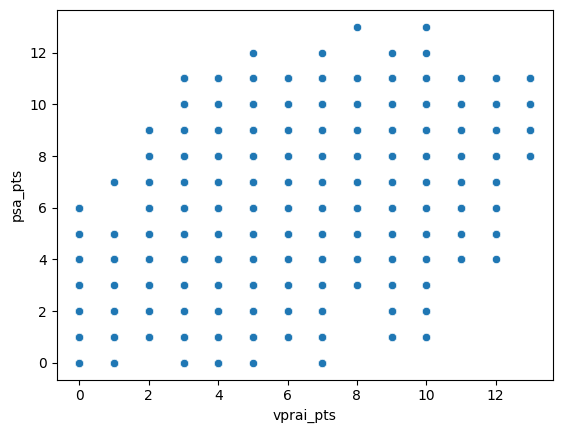

In [ ]:
gdf['vprai_pts'] = pd.to_numeric(gdf['VPRAI_TotalPoints_Opt1'], errors='coerce')
gdf['psa_pts'] = pd.to_numeric(gdf['PSA_NCA_TotalPoints'], errors='coerce')
sns.scatterplot(x='vprai_pts',y='psa_pts',data=gdf)
gdf.loc[:,['vprai_pts','psa_pts']].corr()

In [ ]:
gdf.sort_values('vprai_pts',axis=0)
gdf.loc[:,['recid', 'vprai_pts'] ].groupby('vprai_pts').describe()

recid                                              
            count      mean       std  min  25%  50%   75%  max
vprai_pts                                                      
0.0        7252.0  0.133756  0.340414  0.0  0.0  0.0  0.00  1.0
1.0          44.0  0.136364  0.347142  0.0  0.0  0.0  0.00  1.0
2.0        4832.0  0.192674  0.394440  0.0  0.0  0.0  0.00  1.0
3.0        2455.0  0.204073  0.403105  0.0  0.0  0.0  0.00  1.0
4.0        1094.0  0.247715  0.431883  0.0  0.0  0.0  0.00  1.0
5.0        1621.0  0.258482  0.437936  0.0  0.0  0.0  1.00  1.0
6.0        1861.0  0.231059  0.421623  0.0  0.0  0.0  0.00  1.0
7.0        1113.0  0.234501  0.423877  0.0  0.0  0.0  0.00  1.0
8.0         776.0  0.264175  0.441177  0.0  0.0  0.0  1.00  1.0
9.0         793.0  0.255990  0.436692  0.0  0.0  0.0  1.00  1.0
10.0        336.0  0.250000  0.433659  0.0  0.0  0.0  0.25  1.0
11.0        158.0  0.265823  0.443175  0.0  0.0  0.0  1.00  1.0
12.0        126.0  0.293651  0.457252  0.0  0.0  0.0  1.00  1.0
13.0         38.0  0.210526  0.413155  0.0  0.0  0.0  0.00  1.0

In [ ]:
gdf.sort_values('psa_pts',axis=0)
gdf.loc[:,['recid', 'psa_pts'] ].groupby('psa_pts').describe()

recid                                               
          count      mean       std  min   25%  50%   75%  max
psa_pts                                                       
0.0      5690.0  0.115466  0.319611  0.0  0.00  0.0  0.00  1.0
1.0      2528.0  0.174842  0.379907  0.0  0.00  0.0  0.00  1.0
2.0      3599.0  0.207558  0.405615  0.0  0.00  0.0  0.00  1.0
3.0      1905.0  0.212598  0.409253  0.0  0.00  0.0  0.00  1.0
4.0      2120.0  0.225472  0.417991  0.0  0.00  0.0  0.00  1.0
5.0      1921.0  0.235815  0.424617  0.0  0.00  0.0  0.00  1.0
6.0      1374.0  0.243814  0.429538  0.0  0.00  0.0  0.00  1.0
7.0      1107.0  0.238482  0.426348  0.0  0.00  0.0  0.00  1.0
8.0      1027.0  0.249270  0.432801  0.0  0.00  0.0  0.00  1.0
9.0       834.0  0.268585  0.443490  0.0  0.00  0.0  1.00  1.0
10.0      283.0  0.261484  0.440221  0.0  0.00  0.0  1.00  1.0
11.0      107.0  0.271028  0.446582  0.0  0.00  0.0  1.00  1.0
12.0        4.0  0.750000  0.500000  0.0  0.75  1.0  1.00  1.0
13.0        2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0